In [32]:
%config Completer.use_jedi = False

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [34]:
data = fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

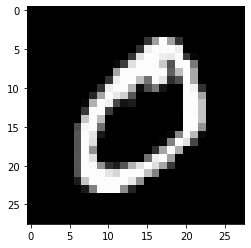

In [35]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [44]:
tsne = TSNE(n_components=2, random_state=42)
pca = PCA(n_components=2)

transformed_data_tsne = tsne.fit_transform(pixel_values[:3000, :])
transformed_data_pca = pca.fit_transform(pixel_values[:3000, :])

In [45]:
transformed_data_tsne, transformed_data_pca

(array([[ -5.281551 , -28.952768 ],
        [-26.105896 , -68.06932  ],
        [-42.503582 ,  35.58039  ],
        ...,
        [ 13.466378 ,  47.369007 ],
        [ -2.4357524,   7.983772 ],
        [ -4.2482643, -13.26691  ]], dtype=float32),
 array([[ 163.26586685,  346.43520356],
        [1077.73066403,  389.65105792],
        [ -75.70130889, -416.94207965],
        ...,
        [-457.94846338, -196.70126114],
        [-742.24261167,   63.13547532],
        [  69.89800535,  157.19089391]]))

In [46]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data_tsne, targets[:3000])),
    columns=['x', 'y', 'targets']
)
pca_df = pd.DataFrame(
    np.column_stack((transformed_data_pca, targets[:3000])),
    columns=['x', 'y', 'targets']
)

tsne_df['targets'] = tsne_df.targets.astype(int)
pca_df['targets'] = pca_df.targets.astype(int)

In [47]:
tsne_df

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9
...,...,...,...
2995,9.038110,58.850792,7
2996,-29.405334,-60.951775,0
2997,13.466378,47.369007,9
2998,-2.435752,7.983772,1


In [49]:
pca_df

,x,y,targets
0,163.265867,346.435204,5
1,1077.730664,389.651058,0
2,-75.701309,-416.942080,4
3,-909.506731,617.938552,1
4,-344.804673,-716.557737,9
...,...,...,...
2995,-263.802833,-837.788451,7
2996,1308.055933,264.359971,0
2997,-457.948463,-196.701261,9
2998,-742.242612,63.135475,1


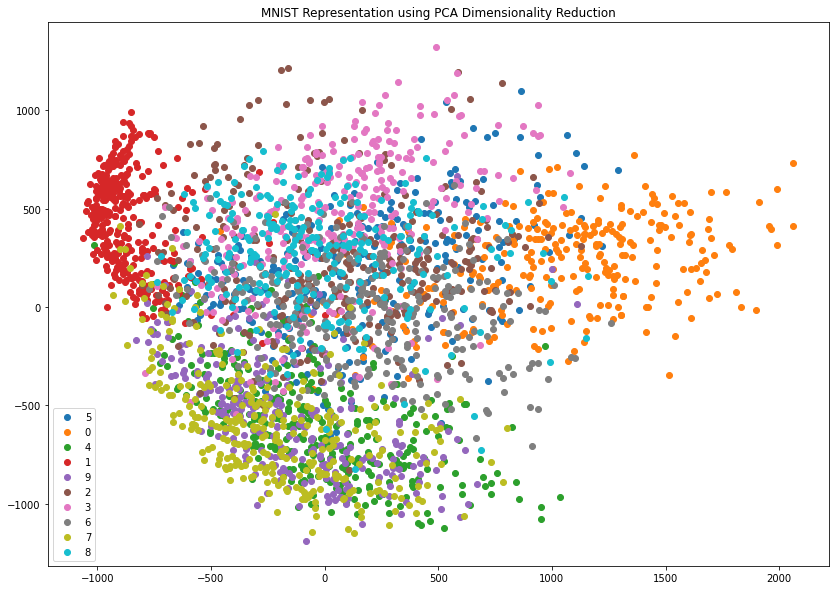

In [50]:
plt.figure(figsize=(14, 10))
plt.title('MNIST Representation using PCA Dimensionality Reduction')
for i in pca_df['targets'].unique():
    plt.scatter(pca_df[pca_df['targets'] == i].x, pca_df[pca_df['targets'] == i].y)
    
plt.legend(labels=pca_df['targets'].unique())

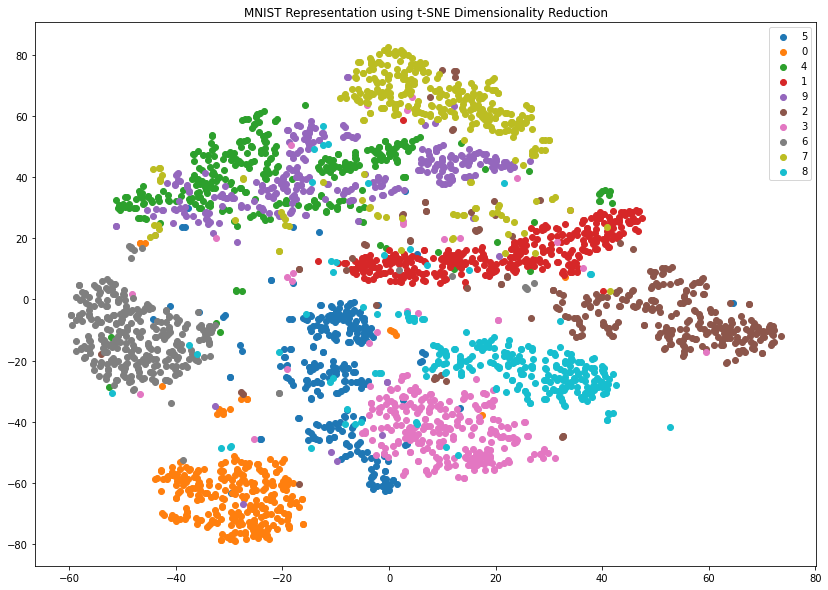

In [51]:
plt.figure(figsize=(14, 10))
plt.title('MNIST Representation using t-SNE Dimensionality Reduction')
for i in tsne_df['targets'].unique():
    plt.scatter(tsne_df[tsne_df['targets'] == i].x, tsne_df[tsne_df['targets'] == i].y)
    
plt.legend(labels=tsne_df['targets'].unique())

/home/unai/miniconda3/envs/ml/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


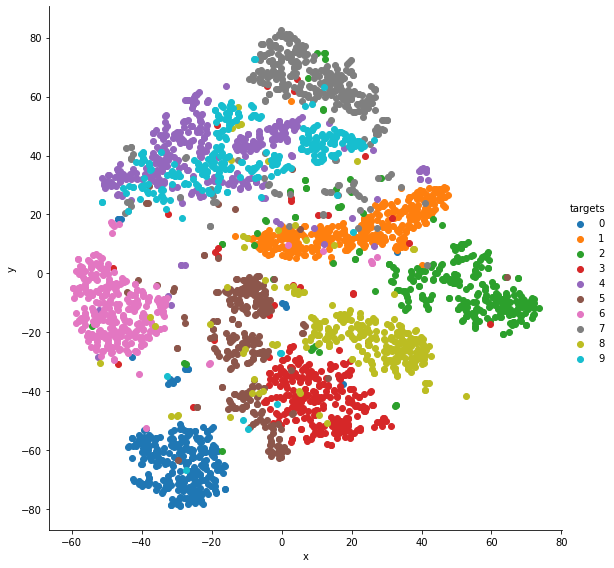

In [52]:
grid = sns.FacetGrid(tsne_df, hue='targets', size=8)

grid.map(plt.scatter, 'x', 'y').add_legend()

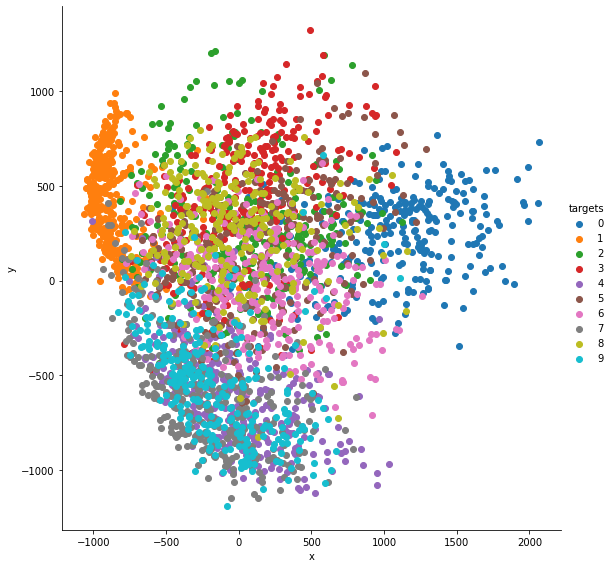

In [53]:
grid = sns.FacetGrid(pca_df, hue='targets', size=8)

grid.map(plt.scatter, 'x', 'y').add_legend()